In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt 

sns.set()


dataFrame = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)
dfi = dataFrame
dataFrameTeste = dataFrame

def formatDate(date):
    dateStr = str(date)
    formatedDate = dateStr[0:4] + '-' + dateStr[4:6] + '-' +dateStr[6:8]
    return formatedDate

popmun =  pd.read_csv('../data/municipio.csv', low_memory=False)


dataFrame['FormattedDate'] = dataFrame['Date'].apply(formatDate)
dataFrameDeaths = pd.read_csv('../data/cases-brazil-cities-time-normalized.csv') # fonte https://github.com/wcota/covid19br

dataFrame = dataFrame.astype({'Date':'object'})
dfs = dataFrame.loc[dataFrame['CityName'] == 'Sao Paulo']
dfs = dfs.loc[dfs['RegionCode'] == 'BR_SP']

dataFrame = dataFrame.dropna(axis=0,how='any', subset=['CityName'])
dataFrame = pd.merge(dataFrame, dataFrameDeaths, left_on=['FormattedDate','CityName','RegionCode'], right_on=['date','city', 'state'], how='left')


In [2]:
popmun = popmun.astype({'id_municipio':'string'})
popmun['id_municipio'] =  popmun['id_municipio']
popmun = popmun.loc[popmun['ano'] == 2019]


In [3]:
dataFrame = pd.merge(dataFrame, popmun, left_on=['CityCode'], right_on=['id_municipio'], how='inner')

In [4]:
dataFrame

,CountryName,CountryCode,RegionName,RegionCode,CityName,CityCode,Jurisdiction,Date,C1_School closing,C1_Flag,...,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,ano,sigla_uf,id_municipio,populacao
0,Brazil,BRA,Acre,BR_AC,Cruzeiro do Sul,BR_1200203,CITY_GOV,20200101,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,BR_AC,BR_1200203,88376.0
1,Brazil,BRA,Acre,BR_AC,Cruzeiro do Sul,BR_1200203,CITY_GOV,20200102,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,BR_AC,BR_1200203,88376.0
2,Brazil,BRA,Acre,BR_AC,Cruzeiro do Sul,BR_1200203,CITY_GOV,20200103,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,BR_AC,BR_1200203,88376.0
3,Brazil,BRA,Acre,BR_AC,Cruzeiro do Sul,BR_1200203,CITY_GOV,20200104,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,BR_AC,BR_1200203,88376.0
4,Brazil,BRA,Acre,BR_AC,Cruzeiro do Sul,BR_1200203,CITY_GOV,20200105,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,BR_AC,BR_1200203,88376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132997,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220327,NaN,NaN,...,727.0,0.0,73741.0,232.01,23533.185,0.01,2019,BR_TO,BR_1721000,299127.0
132998,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220328,NaN,NaN,...,727.0,0.0,73741.0,232.01,23533.185,0.01,2019,BR_TO,BR_1721000,299127.0
132999,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220329,NaN,NaN,...,727.0,4.0,73745.0,232.01,23534.462,0.01,2019,BR_TO,BR_1721000,299127.0
133000,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220330,NaN,NaN,...,727.0,7.0,73752.0,232.01,23536.696,0.01,2019,BR_TO,BR_1721000,299127.0


In [5]:
dataFrame = dataFrame.drop(columns=[ 
'H4_Emergency investment in healthcare','H4_Notes',
'H5_Investment in vaccines','H5_Notes','M1_Wildcard','V1_Vaccine Prioritisation',
'V1_Notes',
'V2_Vaccine Availability',
'V2_Notes',
'V3_Vaccine Financial Support',
'V3_Notes',
'V4_Mandatory Vaccination',
'V4_Notes','E3_Fiscal measures','E3_Notes','E4_International support',
'E4_Notes'])




In [6]:

dataFrame['StringencyIndexForDisplay']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
132997    40.74
132998    40.74
132999    40.74
133000    40.74
133001    40.74
Name: StringencyIndexForDisplay, Length: 133002, dtype: float64

In [7]:
#
#


# dataFrameCityWide = dataFrame.loc[(dataFrame['Jurisdiction'] == 'CITY_WIDE')]
# dataFrameCityTotal = dataFrame.loc[(dataFrame['Jurisdiction'] == 'CITY_TOTAL')]

# dataFrameE1IncomeSuportCityWide = dataFrameE1IncomeSupport.loc[(dataFrameE1IncomeSupport['Jurisdiction'] == 'CITY_WIDE')]
# dataFrameE1IncomeSuportCityWideZero = dataFrameE1IncomeSuportCityWide.loc[(dataFrameE1IncomeSupport['E1_Income support'] == 0)] 


Text(0, 0.5, 'novas mortes por dia')

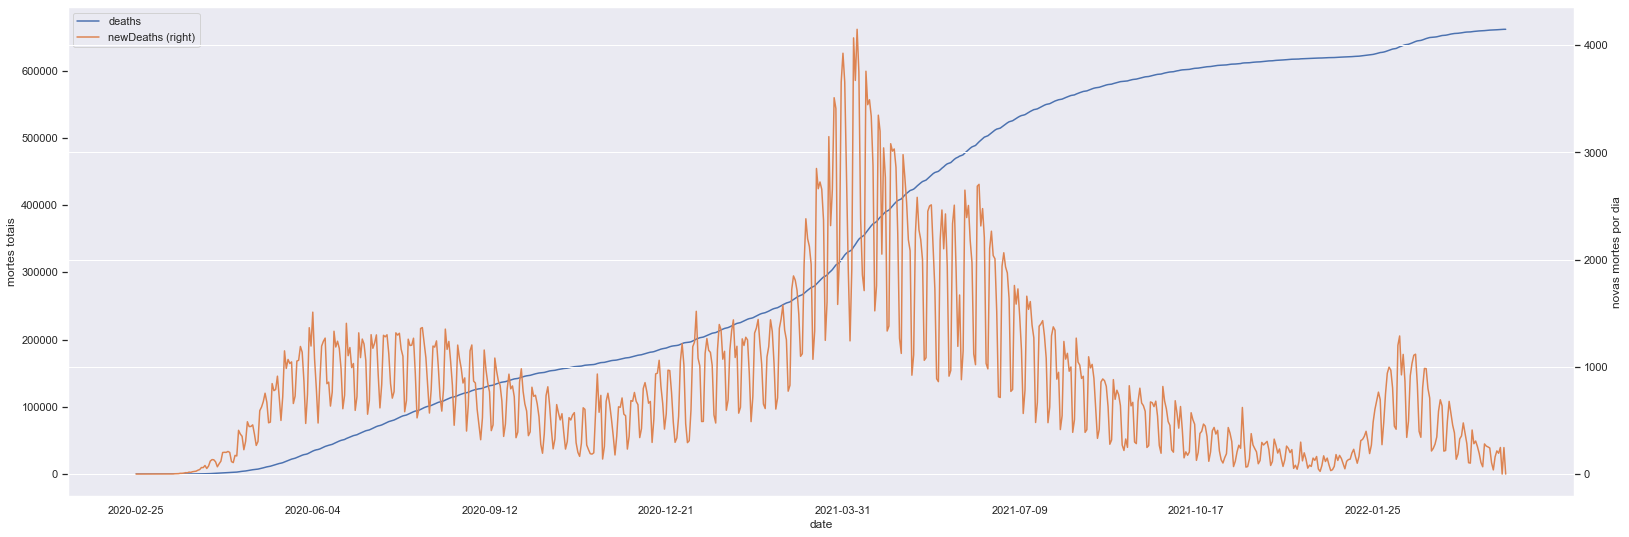

In [8]:
#dataFrameConfirmedDeaths = dataFrame.dropna(axis=0,how='any',subset=['ConfirmedDeaths'])
#dataFrameConfirmedDeaths.groupby('Date').sum().plot(kind='cd ',y=['ConfirmedDeaths' ], figsize=(18,9))
dataFrameDeaths = dataFrameDeaths.loc[dataFrameDeaths['city'] != 'BR_TOTBR_AL'] 
plotDeaths = dataFrameDeaths.groupby('date').sum().plot(y='deaths',  figsize=(27,9))
plotNewDeaths =  dataFrameDeaths.groupby('date').sum().plot( y='newDeaths', secondary_y=True, figsize=(27,9), ax=plotDeaths)
plotDeaths.set_ylabel('mortes totais')
plotNewDeaths.set_ylabel('novas mortes por dia')


In [9]:

# plot1 = dataFrameE1IncomeSuportCityWide.groupby('FormattedDate').sum().plot(y='E1_Income support' ,figsize=(27,9))
# plot2 = dataFrame.groupby('FormattedDate').sum().plot(y='newDeaths',secondary_y=True, ax=plot1, figsize=(27,9))



In [10]:
### get pib per capita, idh set

dataFramePib = pd.read_csv('../data/vw_pib_percapita.csv', low_memory=False)
dataFrameWithPib = pd.merge(dataFrame, dataFramePib, left_on='CityName', right_on='nome',how='inner')

dataFrameIdhm = pd.read_csv('../data/idhm2010-norm.csv', low_memory=False)

dataFrameWithIdh = pd.merge(dataFrame, dataFrameIdhm, left_on=['CityName','RegionCode'], right_on=['name','state'],how='inner')
dataFrameWithIdh.groupby('CityName').max()
dataFrameWithIdh['idhm_class'] = dataFrameWithIdh['idhm'].apply(lambda x : int(x*1000/50))




C:\Users\edupo\AppData\Local\Temp\ipykernel_17368\1884163447.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dataFrameWithIdh.groupby('CityName').max()


In [11]:
dataFrameWithIdh.groupby('idhm_class').nunique()

,CountryName,CountryCode,RegionName,RegionCode,CityName,CityCode,Jurisdiction,Date,C1_School closing,C1_Flag,...,ano,sigla_uf,id_municipio,populacao,name,state_y,idhm,idhmr,idhml,idhme
idhm_class,,,,,,,,,,,,,,,,,,,,,
12,1,1,3,3,3,3,3,821,4,1,...,1,3,3,3,3,3,3,3,3,3
13,1,1,6,6,6,6,3,821,4,2,...,1,6,6,6,6,6,6,6,6,6
14,1,1,14,14,16,16,3,821,4,2,...,1,14,16,16,16,14,14,16,15,14
15,1,1,18,18,20,20,3,821,4,2,...,1,18,20,20,20,18,16,18,18,17
16,1,1,7,7,9,9,3,821,4,2,...,1,7,9,9,9,7,8,9,6,9


In [12]:
#p1 = dataFrameWithIdhE1.groupby('FormattedDate').sum().plot(y='deaths_per_100k_inhabitants', figsize=(27,9))
#p2 =  dataFrameWithIdhE1.groupby('FormattedDate').sum().plot(y='newDeaths', secondary_y=True ,figsize=(27,9), ax=p1)\
dfReindexed = dataFrame

In [13]:



dfReindexed = dfReindexed.loc[dfReindexed['Jurisdiction'] == 'CITY_TOTAL'].set_index(['FormattedDate','CityName','RegionCode'])

dfReindexed['newDeathsOri'] = dfReindexed['ConfirmedDeaths'] - dfReindexed['ConfirmedDeaths'].shift(+1)

dfReindexed['C1_CHANGE'] =  dfReindexed['C1_School closing'] -  dfReindexed['C1_School closing'].shift(+1)

dfReindexed['C2_CHANGE'] =  dfReindexed['C2_Workplace closing'] -  dfReindexed['C2_Workplace closing'].shift(+1)

dfReindexed['C3_CHANGE'] =  dfReindexed['C3_Cancel public events'] -  dfReindexed['C3_Cancel public events'].shift(+1)
dfReindexed['C4_CHANGE'] =  dfReindexed['C4_Restrictions on gatherings'] -  dfReindexed['C4_Restrictions on gatherings'].shift(+1)
dfReindexed['C5_CHANGE'] =  dfReindexed['C5_Close public transport'] -  dfReindexed['C5_Close public transport'].shift(+1)
dfReindexed['C6_CHANGE'] =  dfReindexed['C6_Stay at home requirements'] -  dfReindexed['C6_Stay at home requirements'].shift(+1)

dfReindexed['C7_CHANGE'] =  dfReindexed['C7_Restrictions on internal movement'] -  dfReindexed['C7_Restrictions on internal movement'].shift(+1)
dfReindexed['C8_CHANGE'] =  dfReindexed['C8_International travel controls'] -  dfReindexed['C8_International travel controls'].shift(+1)


dfReindexed['H1_CHANGE'] =  dfReindexed['H1_Public information campaigns'] -  dfReindexed['H1_Public information campaigns'].shift(+1)



dfReindexed['totalCases_per_100k_inhabitantsMA'] = dfReindexed['totalCases_per_100k_inhabitants'].rolling(14, center=True).mean()

dfReindexed['totalCases_per_100k_inhabitantsMA+5'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-5)
dfReindexed['totalCases_per_100k_inhabitantsMA+10'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-10)
dfReindexed['totalCases_per_100k_inhabitantsMA+15'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-15)
dfReindexed['totalCases_per_100k_inhabitantsMA+20'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-20)
dfReindexed['totalCases_per_100k_inhabitantsMA+25'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-25)
dfReindexed['totalCases_per_100k_inhabitantsMA+30'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-30)
dfReindexed['totalCases_per_100k_inhabitantsMA+35'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-35)
dfReindexed['totalCases_per_100k_inhabitantsMA+40'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-40)
dfReindexed['totalCases_per_100k_inhabitantsMA+45'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-45)
dfReindexed['totalCases_per_100k_inhabitantsMA+50'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-50)
dfReindexed['totalCases_per_100k_inhabitantsMA+55'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-55)
dfReindexed['totalCases_per_100k_inhabitantsMA+60'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-60)
dfReindexed['totalCases_per_100k_inhabitantsMA+90'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-90)
dfReindexed['totalCases_per_100k_inhabitantsMA+120'] = dfReindexed['totalCases_per_100k_inhabitantsMA'].shift(-120)


dfReindexed['deaths_per_100k_inhabitantsMA'] = dfReindexed['deaths_per_100k_inhabitants'].rolling(14, center=True).mean()

dfReindexed['deaths_per_100k_inhabitantsMA+5']  =  dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-5)
dfReindexed['deaths_per_100k_inhabitantsMA+10'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-10)
dfReindexed['deaths_per_100k_inhabitantsMA+15'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-15)
dfReindexed['deaths_per_100k_inhabitantsMA+20'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-20)
dfReindexed['deaths_per_100k_inhabitantsMA+25'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-25)
dfReindexed['deaths_per_100k_inhabitantsMA+30'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-30)
dfReindexed['deaths_per_100k_inhabitantsMA+35'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-35)
dfReindexed['deaths_per_100k_inhabitantsMA+40'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-40)
dfReindexed['deaths_per_100k_inhabitantsMA+45'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-45)
dfReindexed['deaths_per_100k_inhabitantsMA+50'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-50)
dfReindexed['deaths_per_100k_inhabitantsMA+55'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-55)
dfReindexed['deaths_per_100k_inhabitantsMA+60'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-60)
dfReindexed['deaths_per_100k_inhabitantsMA+90'] = dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-90)
dfReindexed['deaths_per_100k_inhabitantsMA+120']=dfReindexed['deaths_per_100k_inhabitantsMA'].shift(-120)


dfReindexed['newDeathsPer100k'] = dfReindexed['newDeaths']*100000/dfReindexed['populacao']
dfReindexed['newDeathsPer100kOri'] = dfReindexed['newDeathsOri']*100000/dfReindexed['populacao']

dfReindexed['newDeathsMA'] = dfReindexed['newDeathsPer100k'].rolling(14, center=True).mean()
dfReindexed['newDeathsMAOri'] = dfReindexed['newDeathsPer100kOri'].rolling(14, center=True).mean()

dfReindexed['newDeathsMA+5'] = dfReindexed['newDeathsMA'].shift(-5)
dfReindexed['newDeathsMA+10'] = dfReindexed['newDeathsMA'].shift(-10)
dfReindexed['newDeathsMA+15'] = dfReindexed['newDeathsMA'].shift(-15)
dfReindexed['newDeathsMA+20'] = dfReindexed['newDeathsMA'].shift(-20)
dfReindexed['newDeathsMA+25'] = dfReindexed['newDeathsMA'].shift(-25)
dfReindexed['newDeathsMA+30'] = dfReindexed['newDeathsMA'].shift(-30)
dfReindexed['newDeathsMA+35'] = dfReindexed['newDeathsMA'].shift(-35)
dfReindexed['newDeathsMA+40'] = dfReindexed['newDeathsMA'].shift(-40)
dfReindexed['newDeathsMA+45'] = dfReindexed['newDeathsMA'].shift(-45)
dfReindexed['newDeathsMA+50'] = dfReindexed['newDeathsMA'].shift(-50)
dfReindexed['newDeathsMA+55'] = dfReindexed['newDeathsMA'].shift(-55)
dfReindexed['newDeathsMA+60'] = dfReindexed['newDeathsMA'].shift(-60)
dfReindexed['newDeathsMA+90'] = dfReindexed['newDeathsMA'].shift(-90)
dfReindexed['newDeathsMA+120'] = dfReindexed['newDeathsMA'].shift(-120)

dfReindexed = dfReindexed.reset_index()


C:\Users\edupo\AppData\Local\Temp\ipykernel_17368\1117494083.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfReindexed['newDeathsMA+90'] = dfReindexed['newDeathsMA'].shift(-90)
C:\Users\edupo\AppData\Local\Temp\ipykernel_17368\1117494083.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfReindexed['newDeathsMA+120'] = dfReindexed['newDeathsMA'].shift(-120)


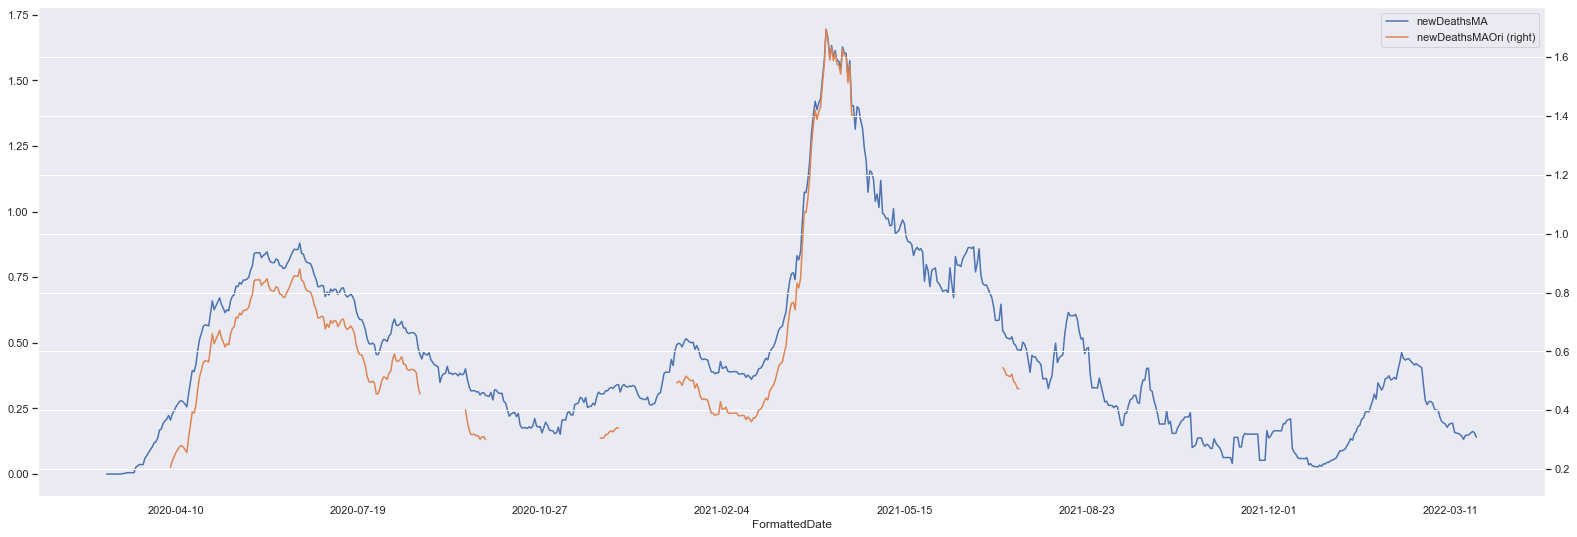

In [14]:
pl1 = dfReindexed.loc[dfReindexed['CityName'] == 'Sao Paulo'].groupby('FormattedDate').mean().plot(y='newDeathsMA', figsize=(27,9))
pl2 = dfReindexed.loc[dfReindexed['CityName'] == 'Sao Paulo'].groupby('FormattedDate').mean().plot(y='newDeathsMAOri',ax=pl1, secondary_y=True, figsize=(27,9))


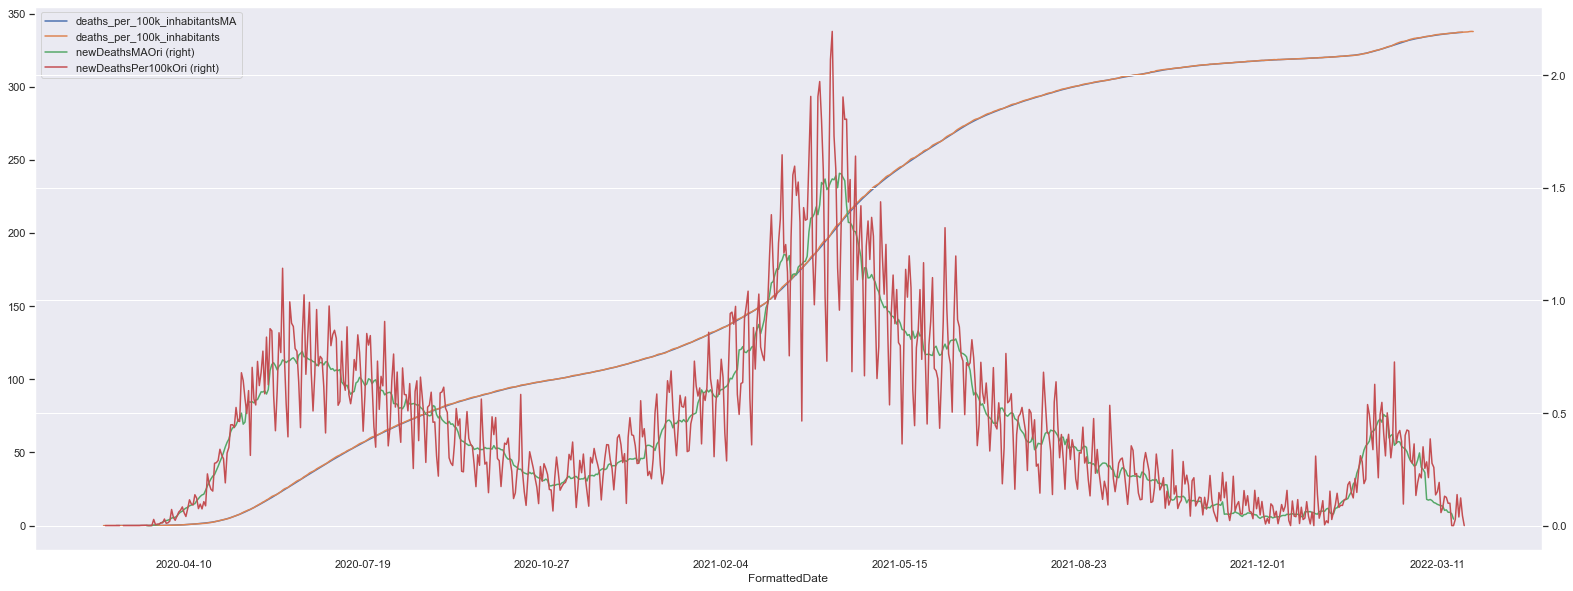

In [15]:

pl1 = dfReindexed.groupby('FormattedDate').mean().plot(y=[ 'deaths_per_100k_inhabitantsMA', 'deaths_per_100k_inhabitants'],figsize=(27,10))
pl2 = dfReindexed.groupby('FormattedDate').mean().plot(y=['newDeathsMAOri', 'newDeathsPer100kOri'],ax=pl1, secondary_y=True, figsize=(27,10))

<AxesSubplot:>

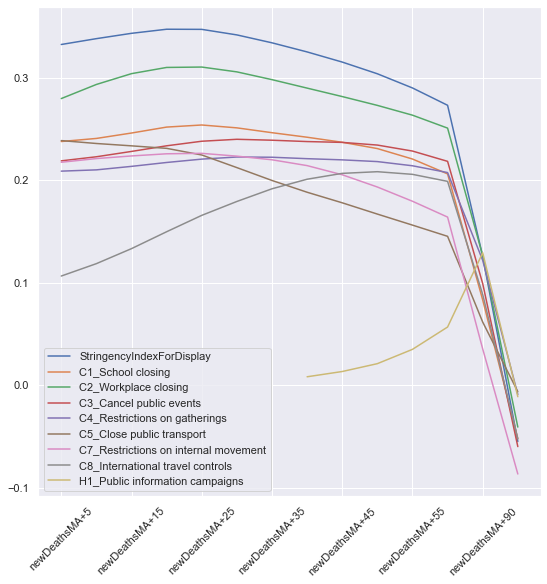

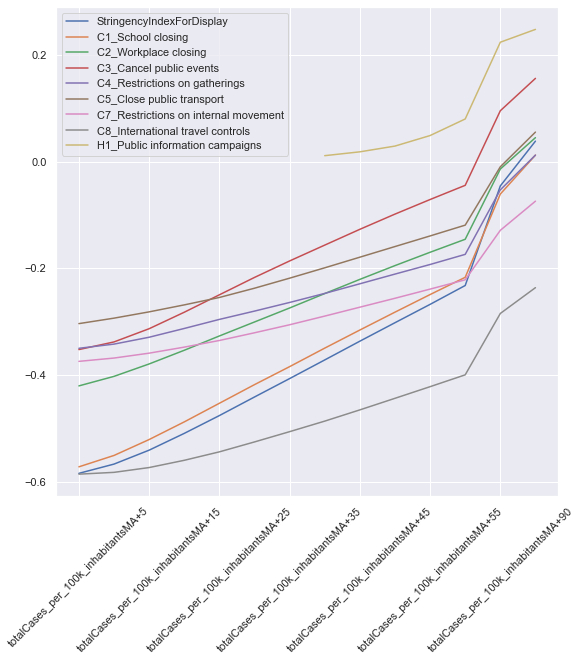

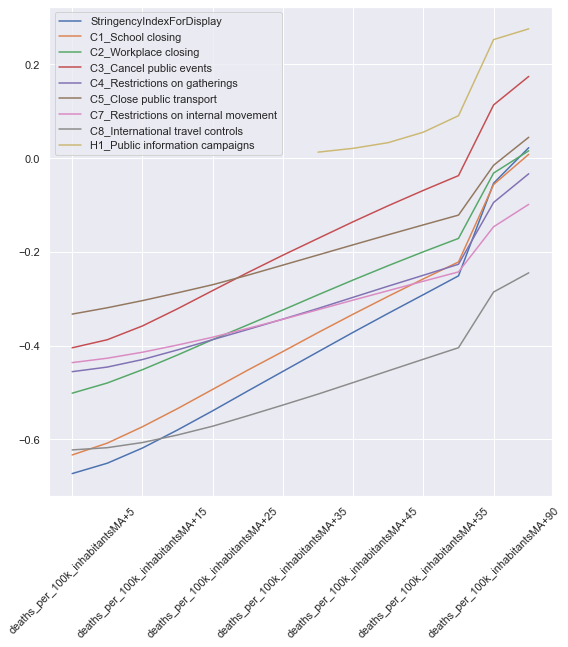

In [16]:
corr_matrix = dfReindexed.corr(method='pearson')
pd.options.display.float_format = "{:,.4f}".format
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix).stack().sort_values(ascending=False)
pd.options.display.max_rows = 15
pd.set_option('display.max_rows', len(sol))
#dfReindexed = dfReindexed.set_index(['FormattedDate','CityName','RegionCode'])
corrmat =  corr_matrix.filter(regex='.*newDeathsMA\+.*')
corrmat.T.plot(y=['StringencyIndexForDisplay', 'C1_School closing','C2_Workplace closing',
'C3_Cancel public events','C4_Restrictions on gatherings',
'C5_Close public transport',
'C7_Restrictions on internal movement', 'C8_International travel controls',
'H1_Public information campaigns' ], figsize=(9,9), rot=45)
corr_matrix.filter(regex='.*newDeathsMA\+.*').to_csv('12nd.csv',float_format='%.4f')
corr_matrix.filter(regex='.*totalCases_per_100k_inhabitantsMA\+.*').to_csv('22tc.csv',float_format='%.4f')
corr_matrix.filter(regex='.*deaths_per_100k_inhabitantsMA\+.*').to_csv('32d.csv',float_format='%.4f')

corrmat2 =  corr_matrix.filter(regex='.*totalCases_per_100k_inhabitantsMA\+.*')
corrmat2.T.plot(y=['StringencyIndexForDisplay','C1_School closing','C2_Workplace closing',
'C3_Cancel public events','C4_Restrictions on gatherings',
'C5_Close public transport',
'C7_Restrictions on internal movement', 'C8_International travel controls',
'H1_Public information campaigns' ], figsize=(9,9), rot=45)
corrmat3 =  corr_matrix.filter(regex='.*deaths_per_100k_inhabitantsMA\+.*')
corrmat3.T.plot(y=['StringencyIndexForDisplay','C1_School closing','C2_Workplace closing',
'C3_Cancel public events','C4_Restrictions on gatherings',
'C5_Close public transport',
'C7_Restrictions on internal movement', 'C8_International travel controls',
'H1_Public information campaigns' ], figsize=(9,9), rot=45)


#

In [17]:
dfIndicadores = dataFrame[['CityName','RegionName','FormattedDate','C1_School closing' ,
'C2_Workplace closing' ,
'C3_Cancel public events',
'C4_Restrictions on gatherings',
'C5_Close public transport',
'C6_Stay at home requirements',
'C7_Restrictions on internal movement',
'C8_International travel controls',
'H1_Public information campaigns']]

dfIndicadores
dfIndicadoresCorrMat = dfIndicadores.corr(method='pearson')

dfIndicadoresCorrMat


,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns
C1_School closing,1.0000,0.6342,0.6217,0.5075,0.4277,0.5099,0.4035,0.3507,0.3606
C2_Workplace closing,0.6342,1.0000,0.6858,0.5422,0.3779,0.4934,0.3845,0.3364,0.3483
C3_Cancel public events,0.6217,0.6858,1.0000,0.5699,0.3591,0.4805,0.3372,0.3037,0.3798
C4_Restrictions on gatherings,0.5075,0.5422,0.5699,1.0000,0.4062,0.3702,0.3592,0.3448,0.2695
C5_Close public transport,0.4277,0.3779,0.3591,0.4062,1.0000,0.3424,0.3164,0.2958,0.2849
C6_Stay at home requirements,0.5099,0.4934,0.4805,0.3702,0.3424,1.0000,0.4007,0.2388,0.2303
C7_Restrictions on internal movement,0.4035,0.3845,0.3372,0.3592,0.3164,0.4007,1.0000,0.4205,0.1570
C8_International travel controls,0.3507,0.3364,0.3037,0.3448,0.2958,0.2388,0.4205,1.0000,0.2523
H1_Public information campaigns,0.3606,0.3483,0.3798,0.2695,0.2849,0.2303,0.1570,0.2523,1.0000


In [18]:
dfReindexed.columns

Index(['FormattedDate', 'CityName', 'RegionCode', 'CountryName', 'CountryCode',
       'RegionName', 'CityCode', 'Jurisdiction', 'Date', 'C1_School closing',
       ...
       'newDeathsMA+25', 'newDeathsMA+30', 'newDeathsMA+35', 'newDeathsMA+40',
       'newDeathsMA+45', 'newDeathsMA+50', 'newDeathsMA+55', 'newDeathsMA+60',
       'newDeathsMA+90', 'newDeathsMA+120'],
      dtype='object', length=140)

In [19]:
from linearmodels import PanelOLS

ridf = dfReindexed.set_index([ 'CityName','Date'])
#print(PanelOLS(ridf['StringencyIndexForDisplay'], ridf['deaths']).fit())
vec = {'C1_School closing' ,
'C2_Workplace closing' ,
'C3_Cancel public events',
'C4_Restrictions on gatherings',
'C5_Close public transport',
'C6_Stay at home requirements',
'C7_Restrictions on internal movement',
'C8_International travel controls',
'H1_Public information campaigns'}

ef=False
te=False
cr=False

pooledOlsNewDeaths = {}
pooledOlsNewDeaths['newDeathsMA+5'] =   PanelOLS(ridf['newDeathsMA+5'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+10'] = PanelOLS(ridf['newDeathsMA+10'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+10'] = PanelOLS(ridf['newDeathsMA+10'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+15'] = PanelOLS(ridf['newDeathsMA+15'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+20'] = PanelOLS(ridf['newDeathsMA+20'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+25'] = PanelOLS(ridf['newDeathsMA+25'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+30'] = PanelOLS(ridf['newDeathsMA+30'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+35'] = PanelOLS(ridf['newDeathsMA+35'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+40'] = PanelOLS(ridf['newDeathsMA+40'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+45'] = PanelOLS(ridf['newDeathsMA+45'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+50'] = PanelOLS(ridf['newDeathsMA+50'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+60'] = PanelOLS(ridf['newDeathsMA+60'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
pooledOlsNewDeaths['newDeathsMA+90'] = PanelOLS(ridf['newDeathsMA+90'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()


C:\Users\edupo\AppData\Local\Temp\ipykernel_17368\2691399615.py:20: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pooledOlsNewDeaths['newDeathsMA+5'] =   PanelOLS(ridf['newDeathsMA+5'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
C:\Users\edupo\AppData\Roaming\Python\Python310\site-packages\linearmodels\panel\model.py:1184: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\edupo\AppData\Local\Temp\ipykernel_17368\2691399615.py:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pooledOlsNewDeaths['newDeathsMA+10'] = PanelOLS(ridf['newDeathsMA+10'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True).fit()
C:\Users\edupo\AppData\Roaming\Python\Python310\site-p

In [37]:
objeto = PanelOLS(ridf['newDeathsMA+5'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True)

#pooledOlsNewDeaths['newDeathsMA+5'] =   objeto.fit()
print(objeto.formula)

None


C:\Users\edupo\AppData\Local\Temp\ipykernel_17368\2022644419.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  objeto = PanelOLS(ridf['newDeathsMA+5'], ridf[vec],entity_effects=ef,time_effects=te, check_rank=cr,drop_absorbed=True)
C:\Users\edupo\AppData\Roaming\Python\Python310\site-packages\linearmodels\panel\model.py:1184: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [28]:
for key in pooledOlsNewDeaths.keys():
    print(key, pooledOlsNewDeaths[key].rsquared)

newDeathsMA+5 0.1863881153917325
newDeathsMA+10 0.18738790331157773
newDeathsMA+15 0.18627527807402078
newDeathsMA+20 0.18297250330521475
newDeathsMA+25 0.17456790535120903
newDeathsMA+30 0.16203664612626878
newDeathsMA+35 0.1486479875229193
newDeathsMA+40 0.5194839663663398
newDeathsMA+45 0.5131106960441459
newDeathsMA+50 0.5071325576157096
newDeathsMA+60 0.4944252219686922
newDeathsMA+90 0.4667504381219745


In [32]:
pooledOlsNewDeaths['newDeathsMA+15'].formula()

AttributeError: 'PanelEffectsResults' object has no attribute 'formula'

In [20]:

#pooledOlsDeaths
#pooledOlsTotalCases
pooledOlsNewDeaths
#pooledOlsStr

{'newDeathsMA+5':                           PanelOLS Estimation Summary                           
 Dep. Variable:          newDeathsMA+5   R-squared:                        0.1864
 Estimator:                   PanelOLS   R-squared (Between):             -0.4269
 No. Observations:               35063   R-squared (Within):               0.2251
 Date:                Mon, May 30 2022   R-squared (Overall):              0.1864
 Time:                        18:33:55   Log-likelihood                -2.427e+04
 Cov. Estimator:            Unadjusted                                           
                                         F-statistic:                      1003.8
 Entities:                          51   P-value                           0.0000
 Avg Obs:                       687.51   Distribution:                 F(8,35054)
 Min Obs:                       291.00                                           
 Max Obs:                       734.00   F-statistic (robust):             1003.8